# Corner Detection

In [1]:
## Loading Libraries

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

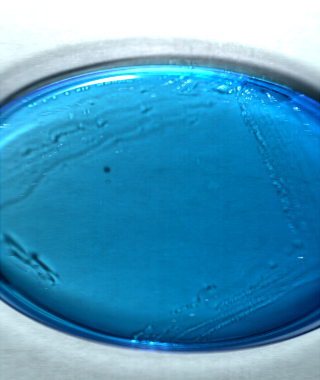

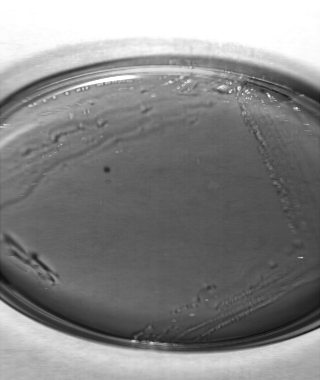

In [4]:
##  Loading Image

img = cv2.imread('image.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img)
cv2_imshow(img_gray)

## Harris Corner Detection

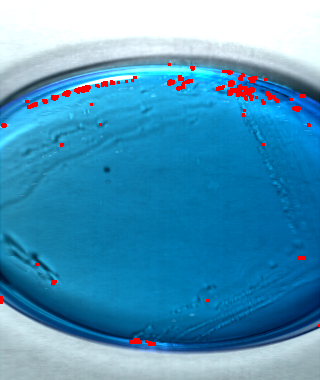

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

dst = cv2.cornerHarris(img_gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

HCD_img=img.copy()

HCD_img[dst>0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(HCD_img)

## Shi-Tomasi Corner Detection (Good Features to Track)

<ipython-input-7-6b50b9c38096>:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


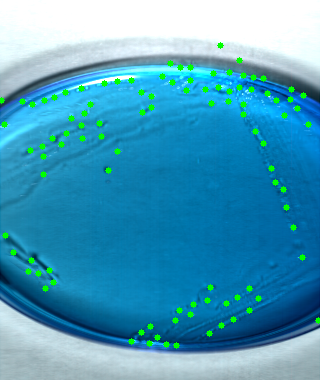

In [7]:
corners = cv2.goodFeaturesToTrack(img_gray, 100, 0.01, 10)
corners = np.int0(corners)

STCD_img = img.copy()

for corner in corners:
  x, y = corner.ravel()
  cv2.circle(STCD_img, (x, y), 3, (0, 255, 0), -1)

cv2_imshow(STCD_img)

## FAST (Features from Accelerated Segment Test) Corner Detection

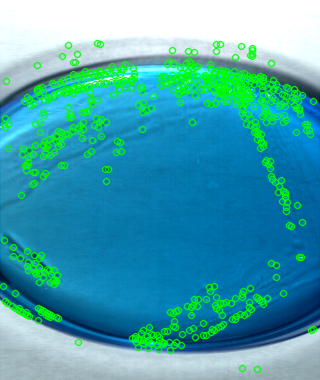

In [11]:
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(img, None)

image_with_corners = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0))

cv2_imshow(image_with_corners)